In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import string

from tensorflow.keras import layers
from tensorflow.keras import losses

%matplotlib inline

In [2]:
df_electronics = pd.read_csv('Datasets/Electronics.tsv', sep='\t', compression='gzip', error_bad_lines=False)

print ('Data read into a pandas dataframe!')

b'Skipping line 9076: expected 15 fields, saw 22\nSkipping line 19256: expected 15 fields, saw 22\nSkipping line 24313: expected 15 fields, saw 22\nSkipping line 47211: expected 15 fields, saw 22\nSkipping line 54295: expected 15 fields, saw 22\nSkipping line 56641: expected 15 fields, saw 22\nSkipping line 63067: expected 15 fields, saw 22\n'
b'Skipping line 93796: expected 15 fields, saw 22\n'
b'Skipping line 132806: expected 15 fields, saw 22\nSkipping line 164631: expected 15 fields, saw 22\nSkipping line 167019: expected 15 fields, saw 22\nSkipping line 167212: expected 15 fields, saw 22\n'
b'Skipping line 198103: expected 15 fields, saw 22\nSkipping line 199191: expected 15 fields, saw 22\nSkipping line 202841: expected 15 fields, saw 22\nSkipping line 218228: expected 15 fields, saw 22\nSkipping line 235900: expected 15 fields, saw 22\n'
b'Skipping line 277761: expected 15 fields, saw 22\nSkipping line 304582: expected 15 fields, saw 22\nSkipping line 312029: expected 15 fields,

Data read into a pandas dataframe!


In [8]:
df_electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091024 entries, 0 to 3091023
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 353.7+ MB


In [9]:
df_electronics.shape

(3091024, 15)

In [6]:
df_electronics.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


In [7]:
df_electronics.tail()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
3091019,US,51216847,RZ3LLAKIZQ3RR,B00000JBAT,738692522,Diamond Rio Digital Player,Electronics,5,0,0,N,N,Next Millenium Consumer Electronics,"Diamond's RIO is the current, silicon-state ni...",1999-06-14
3091020,US,52953714,R1V8GVI67B7V0K,B00000JBAT,738692522,Diamond Rio Digital Player,Electronics,5,0,0,N,N,WOW! THE BEST THING TO HAPPEN TO MUSIC!,The RIO rocks! It is so great that Diamond Mul...,1999-06-13
3091021,US,51764094,R3BDESK5VUNK8C,B00000J4FY,503765214,JVC RVB90 Urban Assault Kaboom (Green),Electronics,5,5,5,N,N,The most powerful boombox ever made.,I have listened to practically every boombox a...,1999-06-12
3091022,US,52011360,R1JJGM0JWVT7DV,B00000JHWN,662358399,Sony DE441 Discman,Electronics,5,3,3,N,N,very nice,compared to my old discman this one is really ...,1999-06-12
3091023,US,51807224,R30PZG0PCGR2V0,0966185056,435880663,The Sights and Sounds of Christmas: The Comple...,Electronics,1,7,9,N,N,The complete collection of what? By whom?,"I love Christmas videos and music, but I usual...",1999-06-09


Untuk Text Classification ini kolom yang digunakan hanya kolom 'review_body' dan 'star_rating'.

Tujuannya adalah untuk mengidentifikasi apakah text pada 'review_body' menunjukan POSITIVE atau NEGATIVE sentiment. Nantinya, model ini dapat digunakan untuk menganalisa hasil review produk di internet.

In [11]:
review = df_electronics[['review_body','star_rating']]

Kita definisikan angka star rating sebagai berikut:

* Star_rating 1-2 didefinisikan sebagai negative sentiment (0)
* Star_rating 3-5 didefinisikan sebagai positive sentiment (1)

Sehingga, nilai star rating lebih dari atau sama dengan 3 kita anggap sebagai positive sentiment (1)

In [12]:
pd.set_option('mode.chained_assignment', None)

review['star_rating'] = review['star_rating'].replace([1,2,3,4,5],[0,0,1,1,1])

Pada kolom **review_body** terdapat kalimat yang terdiri dari beberapa kata dengan bermacam-macam tipe data. Saat tahap Tokenizer nanti, tipe data float atau integer tidak dapat diubah menjadi lowercase, sehingga akan memunculkan error. Oleh karena itu, semua data di kolom **review_body** diubah menjadi string agar saat proses Tokenizer tidak muncul error.

Mengubah data di kolom review_body menjadi tipe string:

In [16]:
#df_electronics["star_rating"] = [float(str(i).replace("-", "")) for i in df_electronics["star_rating"]]

In [17]:
review['review_body'] = review['review_body'].astype('str')

#review['star_rating'] = review.star_rating.astype(float)
#df_sport = df_sport.astype({'star_rating':'float'})

In [18]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091024 entries, 0 to 3091023
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_body  object
 1   star_rating  int64 
dtypes: int64(1), object(1)
memory usage: 47.2+ MB


In [19]:
review.head(10)

,review_body,star_rating
0,As described.,1
1,It works as advertising.,1
2,Works pissa,1
3,Did not work at all.,0
4,Works well. Bass is somewhat lacking but is pr...,1
5,The quality on these speakers is insanely good...,1
6,Wish I could give this product more than five ...,1
7,works great,1
8,Great sound and compact. Battery life seems go...,1
9,It works well~~~,1


**PRE-PROCESSING**

Menghilangkan html tags

In [20]:
import re

def remove_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

review['review_body'] = review['review_body'].apply(remove_html)
review['review_body'] = review['review_body'].apply(remove_URL)

Mengubah semua suku kata menjadi lowercase

In [21]:
def lower_text(text):
    return text.lower()

review['review_body'] = review['review_body'].apply(lower_text)

Membuang special character

In [22]:
def remove_special_char(text):
    x = ""
    
    for i in text:
        if i.isalnum():
            x = x+i
        else:
            x = x+ " "
    return x

review['review_body'] = review['review_body'].apply(remove_special_char)

Membuang stop words, seperti is, are, am, dan lain-lain

In [23]:
import nltk
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

review['review_body'] = review['review_body'].apply(remove_stopwords)

In [24]:
review.head()

,review_body,star_rating
0,described,1
1,works advertising,1
2,works pissa,1
3,work,0
4,works well bass somewhat lacking present overa...,1


In [25]:
review.tail()

,review_body,star_rating
3091019,diamond rio current silicon state nightmare mo...,1
3091020,rio rocks great diamond multimedia prevailed f...,1
3091021,listened practically every boombox available m...,1
3091022,compared old discman one really really great s...,1
3091023,love christmas videos music usually read inqui...,0


Split dataset

In [26]:
from sklearn.model_selection import train_test_split

x = review['review_body'].astype('str')
y = review['star_rating']

x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size = 0.2,random_state=26)

In [27]:
print(x_train.shape)
print(x_test.shape)

(2472819,)
(618205,)


**Menggunakan tokenizer**

Untuk memisahkan teks menjadi potongan-potongan berupa token, bisa berupa potongan huruf, kata, atau kalimat, sebelum dianalisis lebih lanjut.

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)

X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index)+1  #---> +1 karena index dimulai dari 0

In [29]:
word_index=tokenizer.word_index
word_index

{'sound': 1,
 'great': 2,
 'good': 3,
 'one': 4,
 'use': 5,
 'would': 6,
 'quality': 7,
 'like': 8,
 'well': 9,
 'product': 10,
 'get': 11,
 'headphones': 12,
 'works': 13,
 'price': 14,
 'tv': 15,
 'cable': 16,
 'work': 17,
 'time': 18,
 'bought': 19,
 'really': 20,
 'music': 21,
 'also': 22,
 'better': 23,
 'much': 24,
 'even': 25,
 'easy': 26,
 'little': 27,
 'buy': 28,
 'speaker': 29,
 '2': 30,
 'player': 31,
 'ear': 32,
 'used': 33,
 'speakers': 34,
 'got': 35,
 'back': 36,
 'set': 37,
 '34': 38,
 'using': 39,
 'could': 40,
 'nice': 41,
 'radio': 42,
 'unit': 43,
 'still': 44,
 'bass': 45,
 'need': 46,
 'first': 47,
 'battery': 48,
 '3': 49,
 'two': 50,
 'love': 51,
 'recommend': 52,
 'remote': 53,
 '5': 54,
 'ipod': 55,
 'new': 56,
 '1': 57,
 'power': 58,
 'volume': 59,
 'best': 60,
 'way': 61,
 'audio': 62,
 'worked': 63,
 'small': 64,
 'want': 65,
 'fit': 66,
 'go': 67,
 'right': 68,
 'device': 69,
 'long': 70,
 'thing': 71,
 'system': 72,
 'problem': 73,
 'hdmi': 74,
 'without

In [30]:
print('Total ada',vocab_size,'kosakata')

Total ada 399343 kosakata


Menggunakan pad sequences untuk menyamakan dimensi semua data ke maximum length yang ada

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

Untuk memastikan word index nya sesuai, maka dicoba diperiksa data awal dan data setelah preprocessing.

In [32]:
print(x_train.iloc[12345])  #---> data awal
print(X_train_seq[12345])   #---> setelah tokenizing

cable works new monitor great price
[16, 13, 56, 420, 2, 14]


Menggunakan reverse word index untuk mengecek (dengan cara arah berlawanan) apakah data awal dan data setelah preprocessing

In [33]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [34]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [35]:
print(decode(X_train_seq[12345]))  #---> reverse 
print(x_train.iloc[12345])         #---> data awal

cable works new monitor great price
cable works new monitor great price


**Recurrent Neural Network**

Pembuatan model RNN dengan Long Short-Term Memory (LSTM)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras import layers

embedding_dim = 10

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(layers.LSTM(50,dropout=0.1,recurrent_dropout=0.1))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss=['binary_crossentropy'],
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 10)           3993430   
                                                                 
 lstm (LSTM)                 (None, 50)                12200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 4,005,681
Trainable params: 4,005,681
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train_pad, y_train,
                    epochs = 10,
                    steps_per_epoch = 50,
                    verbose = True,
                    validation_data = (X_test_pad,y_test),
                    batch_size = 500)

Epoch 1/10
50/50 [==============================] - 117s 2s/step - loss: 0.3061 - accuracy: 0.8869 - val_loss: 0.2652 - val_accuracy: 0.8934
Epoch 2/10
50/50 [==============================] - 118s 2s/step - loss: 0.2897 - accuracy: 0.8893 - val_loss: 0.2590 - val_accuracy: 0.9005
Epoch 3/10
50/50 [==============================] - 119s 2s/step - loss: 0.2804 - accuracy: 0.8958 - val_loss: 0.3171 - val_accuracy: 0.8923
Epoch 4/10
50/50 [==============================] - 117s 2s/step - loss: 0.2707 - accuracy: 0.8977 - val_loss: 0.3163 - val_accuracy: 0.8998
Epoch 5/10
50/50 [==============================] - 117s 2s/step - loss: 0.2657 - accuracy: 0.9000 - val_loss: 0.2451 - val_accuracy: 0.9072
Epoch 6/10
50/50 [==============================] - 117s 2s/step - loss: 0.2602 - accuracy: 0.9017 - val_loss: 0.2326 - val_accuracy: 0.9085
Epoch 7/10
50/50 [==============================] - 117s 2s/step - loss: 0.2610 - accuracy: 0.9041 - val_loss: 0.2736 - val_accuracy: 0.9014
Epoch 8/10
50

In [44]:
print('Akurasi model =', history.history['accuracy'][-1])

Akurasi model = 0.9070000052452087


In [45]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [46]:
losses = pd.DataFrame(history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.306069,0.88688,0.265194,0.893353
1,0.289664,0.88928,0.259012,0.900522
2,0.280449,0.89584,0.317139,0.892261
3,0.270671,0.89768,0.316257,0.899763
4,0.265744,0.90004,0.245090,0.907246
5,0.260231,0.90168,0.232626,0.908498
6,0.260971,0.90412,0.273563,0.901384
7,0.261015,0.90188,0.270869,0.906447
8,0.255352,0.90376,0.237950,0.906398
9,0.245795,0.90700,0.285613,0.899027


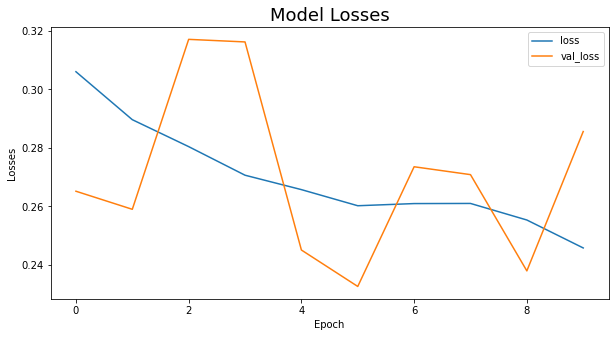

In [47]:
losses[['loss','val_loss']].plot(figsize = (10,5))
plt.title('Model Losses', fontsize = 18)
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.show()

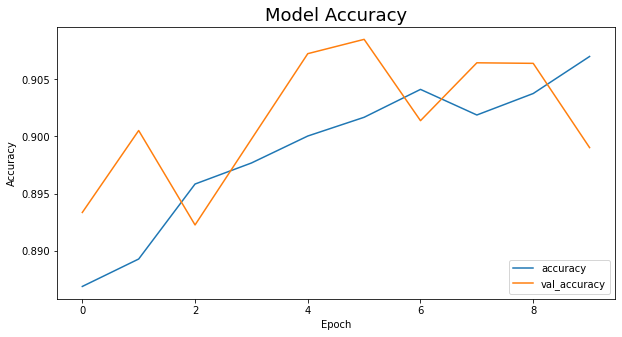

In [48]:
losses[['accuracy','val_accuracy']].plot(figsize=(10,5))
plt.title('Model Accuracy', fontsize = 18)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()